
# <span style="color:rgb(213,80,0)">Tutorial 3 \- Modify Structural Parameters</span>

## Introduction

In this tutorial, we will use a P2D model to simulate the effects of changing structural parameters (like electrode thickness or porosity) on cell discharge. After completing this tutorial, you should have a working knowledge of:

-  Basics of how structural properties are defined in BattMo
-  How changing the thickness of one electrode can affect the overall capacity of the cell
-  How to setup and execute a parameter sweep

We'll use the same model from Tutorial 1.


In [1]:
jsonstruct = parseBattmoJson('Examples/jsondatafiles/sample_input.json');

## Explore the Structural Parameters

Structural parameters are defined in the JSON parameter file and parsed into the MATLAB structure. Once the JSON parameter file has been read into MATLAB as a jsonstruct, its properties can be modified programmatically.


Let's begin by exploring the parameters of the negative electrode coating with the following command:


In [2]:
disp(jsonstruct.NegativeElectrode.Coating)

               thickness: 6.4000e-05
                       N: 10
        effectiveDensity: 1900
    bruggemanCoefficient: 1.5000
          ActiveMaterial: [1x1 struct]
                  Binder: [1x1 struct]
      ConductingAdditive: [1x1 struct]


Here, we can see that the structural and material properties of the coating are defined. Let's try increasing the thickness of the negative electrode from 64 µm to 72 µm.


In [3]:
jsonstruct.NegativeElectrode.Coating.thickness = 72*micro;


Now we can run the simulation and plot the discharge curve against the discharged capacity of the cell.


In [4]:
% instantiate an empty figure
figure()
output = runBatteryJson(jsonstruct);

Solving timestep 01/45:                      -> 3 Seconds, 937 Milliseconds
Solving timestep 02/45: 3 Seconds, 937 Milliseconds -> 7 Seconds, 875 Milliseconds
Solving timestep 03/45: 7 Seconds, 875 Milliseconds -> 15 Seconds, 750 Milliseconds
Solving timestep 04/45: 15 Seconds, 750 Milliseconds -> 31 Seconds, 500 Milliseconds
Solving timestep 05/45: 31 Seconds, 500 Milliseconds -> 63 Seconds
Solving timestep 06/45: 63 Seconds           -> 126 Seconds
Solving timestep 07/45: 126 Seconds          -> 252 Seconds
Solving timestep 08/45: 252 Seconds          -> 378 Seconds
Solving timestep 09/45: 378 Seconds          -> 504 Seconds
Solving timestep 10/45: 504 Seconds          -> 630 Seconds
Solving timestep 11/45: 630 Seconds          -> 756 Seconds
Solving timestep 12/45: 756 Seconds          -> 882 Seconds
Solving timestep 13/45: 882 Seconds          -> 1008 Seconds
Solving timestep 14/45: 1008 Seconds         -> 1134 Seconds
Solving timestep 15/45: 1134 Seconds         -> 1260 Seconds
So


retrieve the states from the simulation result



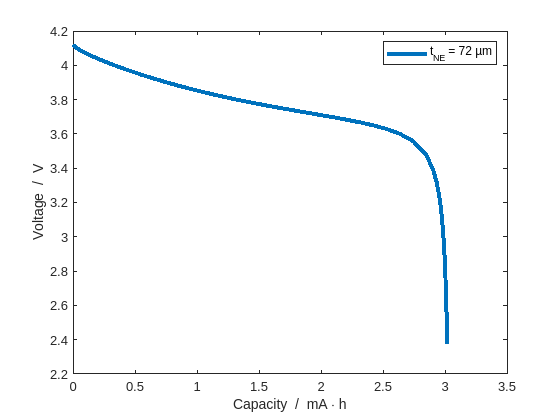

In [5]:
states = output.states;

% extract the time, voltage, and current quantities
time = cellfun(@(state) state.time, states);
voltage = cellfun(@(state) state.('Control').E, states);
current = cellfun(@(state) state.('Control').I, states);

% calculate the capacity
capacity = time .* current;

% plot the discharge curve in the figure
plot((capacity/(hour*milli)), voltage, '-', 'linewidth', 3)
xlabel('Capacity  /  mA \cdot h')
ylabel('Voltage  /  V')
legend('t_{NE} = 72 µm')

## Setup and Run a Parameter Sweep

Now we can setup another parameter sweep to explore the effects of reducing the thickness of the negative electrode coating. Let's try simuating the cell performance with coating thickness values of 16 µm, 32 µm, and 64 µm. As in the previous tutorial, we will first create a vector contianing the desired thickness values. Then we will use a for\-loop to iterate through the thickness values, modify the value in the jsonstruct, and run the simulation. We will then plot the results together for comparison.


In [6]:
% create a vector of diffent thickness values
thickness = [16, 32, 64].*micro;

% instantiate and empty cell array to store the outputs of the simulations
output = cell(size(thickness));

% instantiate an empty figure
figure()

% use a for-loop to iterate through the vector of c-rates
for i = 1 : numel(thickness)
    % modify the value for the c-rate in the control definition and update
    % the total duration of the simulation accordingly
    jsonstruct.NegativeElectrode.Coating.thickness = thickness(i);

    % run the simulation and store the results in the output cell array
    output{i} = runBatteryJson(jsonstruct);

    % retrieve the states from the simulation result
    states = output{i}.states;

    % extract the time and voltage quantities
    time = cellfun(@(state) state.time, states);
    voltage = cellfun(@(state) state.('Control').E, states);
    current = cellfun(@(state) state.('Control').I, states);

    % calculate the capacity
    capacity = time .* current;

    % plot the discharge curve in the figure
    plot((capacity/(hour*milli)), voltage, '-', 'linewidth', 3)
    hold on
end

Solving timestep 01/45:                      -> 3 Seconds, 937 Milliseconds
Solving timestep 02/45: 3 Seconds, 937 Milliseconds -> 7 Seconds, 875 Milliseconds
Solving timestep 03/45: 7 Seconds, 875 Milliseconds -> 15 Seconds, 750 Milliseconds
Solving timestep 04/45: 15 Seconds, 750 Milliseconds -> 31 Seconds, 500 Milliseconds
Solving timestep 05/45: 31 Seconds, 500 Milliseconds -> 63 Seconds
Solving timestep 06/45: 63 Seconds           -> 126 Seconds
Solving timestep 07/45: 126 Seconds          -> 252 Seconds
Solving timestep 08/45: 252 Seconds          -> 378 Seconds
Solving timestep 09/45: 378 Seconds          -> 504 Seconds
Solving timestep 10/45: 504 Seconds          -> 630 Seconds
Solving timestep 11/45: 630 Seconds          -> 756 Seconds
Solving timestep 12/45: 756 Seconds          -> 882 Seconds
Solving timestep 13/45: 882 Seconds          -> 1008 Seconds
Solving timestep 14/45: 1008 Seconds         -> 1134 Seconds
Solving timestep 15/45: 1134 Seconds         -> 1260 Seconds
So


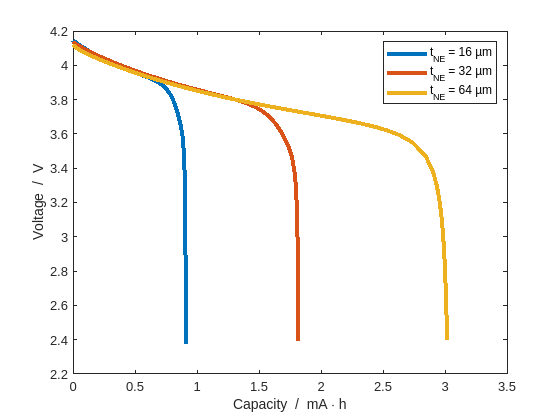

In [7]:
hold off
xlabel('Capacity  /  mA \cdot h')
ylabel('Voltage  /  V')
legend('t_{NE} = 16 µm', 't_{NE} = 32 µm', 't_{NE} = 64 µm')


The results of this parameter sweep show that reducing the thickness of the negative electrode to 32 µm and 16 µm reduces its capacity such that it becomes the limiting factor in the overall capacity of the cell. Note that in real Li\-ion batteries, the capacity of the negative electrode is usually oversized with respect to the capacity of the positive electrode to avoid dangerous lithium plating.

## Summary

In this tutorial, we explored how to modify structural parameters in BattMo. We first learned that structural properties of the electrodes are defined in the structure (e.g. NegativeElectrode.Coating). From there, it is possible to change individual parameter values and simulate the effects on the cell discharge. We then reviewed how to setup a parameter sweep and explored how changing the thickness of the negative electrode coating affects the overall capacity of the cell.

